### THE MULTI ARMED BANDIT PROBLEM

<img src='https://static.wingify.com/gcp/uploads/sites/3/2020/03/image-4-1024x476.png?tr=w-1024'>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_history(history):
    rewards= history['rewards']
    cum_rewards= history['cum_rewards']
    chosen_arms= history['arms']

    fig= plt.figure(figsize=[30,8])
    ax2= fig.add_subplot(121)
    ax2.plot(cum_rewards, label='avg rewards')
    ax2.set_title("Cumulative Rewards")

    ax3= fig.add_subplot(122)
    ax3.bar([i for i in range(len(chosen_arms))],  chosen_arms, label="chosen arms")
    ax3.set_title("Chosen Actions")

#Construindo o ambiente
class Env(object):
    def __init__(self, reward_probas, rewards):
        #Se os dados das probabilidades e das recompensas não tiverem o mesmo tamanho, é criado uma excessão
        if (len(reward_probas) != len(rewards)): 
            raise Exception(f"size of reward probas : {len(reward_probas)} does not match size of rewards: {len(rewards)}")
        
        self.reward_probas=  reward_probas
        self.rewards= rewards
        self.k_arms= len(rewards) #Quantidade de braços vai ser o tamanho da lista de recompensas 
    
    #escolhendo um braço e para isso ele tem que estar entre 0 e o valor de k_arms
    def choose_arm(self, arm):
        if (arm<0 or arm > self.k_arms):
            raise Exception(f"arm must be a value between 0 and {self.k_arms -1}")
        
        return self.rewards[arm] if np.random.random() < self.reward_probas[arm] else 0.0

In [50]:
#Criando um ambiente
enviroment= Env(reward_probas=[0.01, 1.0, 0.75, 0.99, 0.65, 1.0], rewards=[95.0, 0.0, 25.5, 10.05, 5.45, 2.50])
# enviroment= Env(reward_probas=[0.01, 1.0, 0.75, 0.99, 0.65, 1.0], rewards=[35.0, 0.0, 15.5, 40.05, 6.45, 4.50])
print(f"Reward Probas\t\t: {enviroment.reward_probas}")
print(f"Rewards\t\t: {enviroment.rewards}")

Reward Probas		: [0.01, 1.0, 0.75, 0.99, 0.65, 1.0]
Rewards		: [95.0, 0.0, 25.5, 10.05, 5.45, 2.5]


In [51]:
[enviroment.choose_arm(4) for _ in range(10)]

[5.45, 0.0, 5.45, 5.45, 5.45, 5.45, 5.45, 5.45, 0.0, 5.45]

In [52]:
#criando um agente aleatório
class RandomAgent(object):
    def __init__(self, env, max_iterations=2000):
        self.env= env #ambiente
        self.iterations= max_iterations #numero de iterações

    def act(self):
        arm_counts = np.zeros(self.env.k_arms) #numero de vezes que o braço foi selecionado
        rewards = []
        cumulative_rewards= [] #média das recompensas 

        for i in range(1, self.iterations + 1):
            arm= np.random.choice(self.env.k_arms)
            reward= self.env.choose_arm(arm)

            arm_counts[arm] += 1 # O número do braço selecionado aumenta +1 na contagem
            rewards.append(reward)
            cumulative_rewards.append(sum(rewards)/len(rewards)) #fazendo a média
    
        return {"arms": arm_counts, "rewards": rewards, "cum_rewards": cumulative_rewards}

In [53]:
random_agent= RandomAgent(env=enviroment, max_iterations=2000)
ra_history= random_agent.act()
print(f"Total reward: {sum(ra_history['rewards'])}")

Total reward: 12327.999999999978


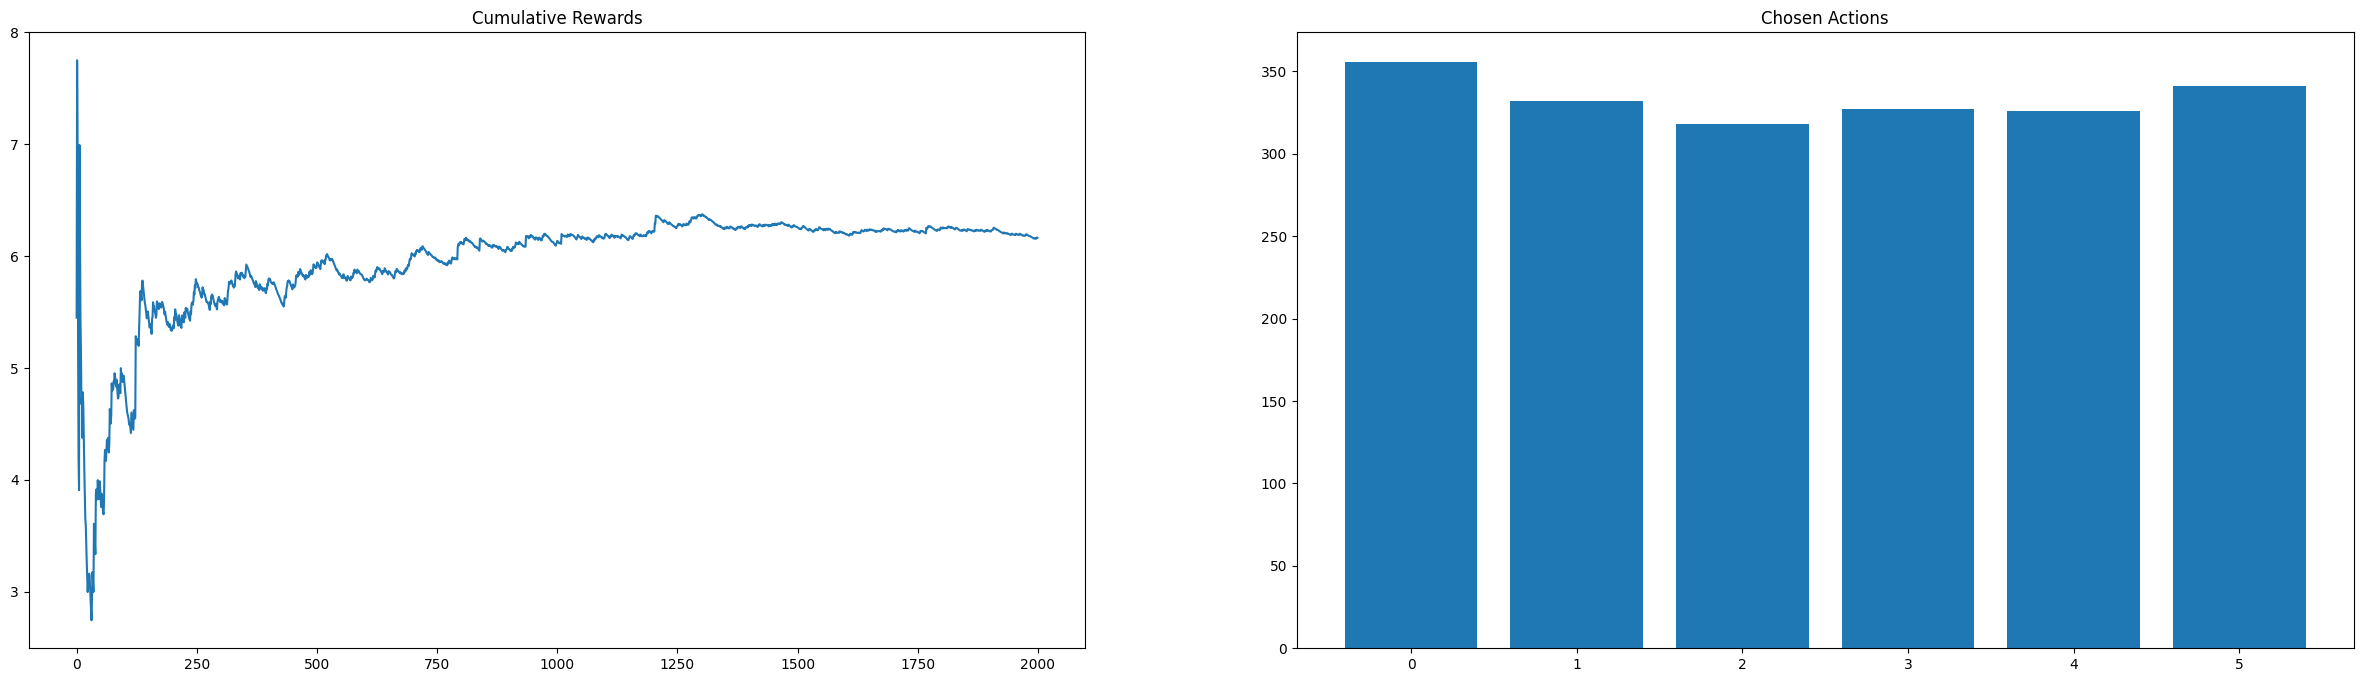

In [54]:
plot_history(ra_history)

In [55]:
#Criando um Agent EpsilonGreedy
class EpsilonGreedyAgent(object):
    
    def __init__(self, env, num_iterations=200, epsilon=0.01, decay=0.001, decay_interval= 50):
        self.env= env
        self.iterations = num_iterations
        self.epsilon = epsilon
        self.decay = decay
        self.decay_interval = decay_interval

    def act(self):
        q_values= np.zeros(self.env.k_arms) 
        arm_rewards= np.zeros(self.env.k_arms)
        arm_counts= np.zeros(self.env.k_arms)

        rewards= []
        cum_rewards= []

        for i in range(1, self.iterations + 1):
            arm= np.random.choice(self.env.k_arms) if np.random.random() < self.epsilon else np.argmax(q_values) #Ele vai escolher um braço aleatório da lista se um numero aleatorio for menor que o epsilon (Precisamos explorar esse braço), caso contrário ele continua com exploitation do braço com maior recompensa
            reward= self.env.choose_arm(arm)

            arm_rewards[arm] += reward #Somando as recompensas de cada braço
            arm_counts[arm] += 1 # Somando + 1 no total de cada braço selecionado
            q_values[arm] = arm_rewards[arm]/arm_counts[arm] # Fazendo a média do total de recompensa do braço x

            rewards.append(reward)
            cum_rewards.append(sum(rewards)/len(rewards)) # fazendo a média geral, diferente do q_values

            if i % self.decay_interval==0: #toda vez que chega em um intervalo de decay, o epsilon fica cada vez menor
                self.epsilon = self.epsilon * self.decay

        return {"arms": arm_counts, "rewards": rewards, "cum_rewards": cum_rewards}
      

In [56]:
egreedy_agent = EpsilonGreedyAgent(enviroment, num_iterations=2000, epsilon=0.1, decay=1)
eg_history = egreedy_agent.act()
print(f"TOTAL REWARD : {sum(eg_history['rewards'])}")

TOTAL REWARD : 33949.899999999994


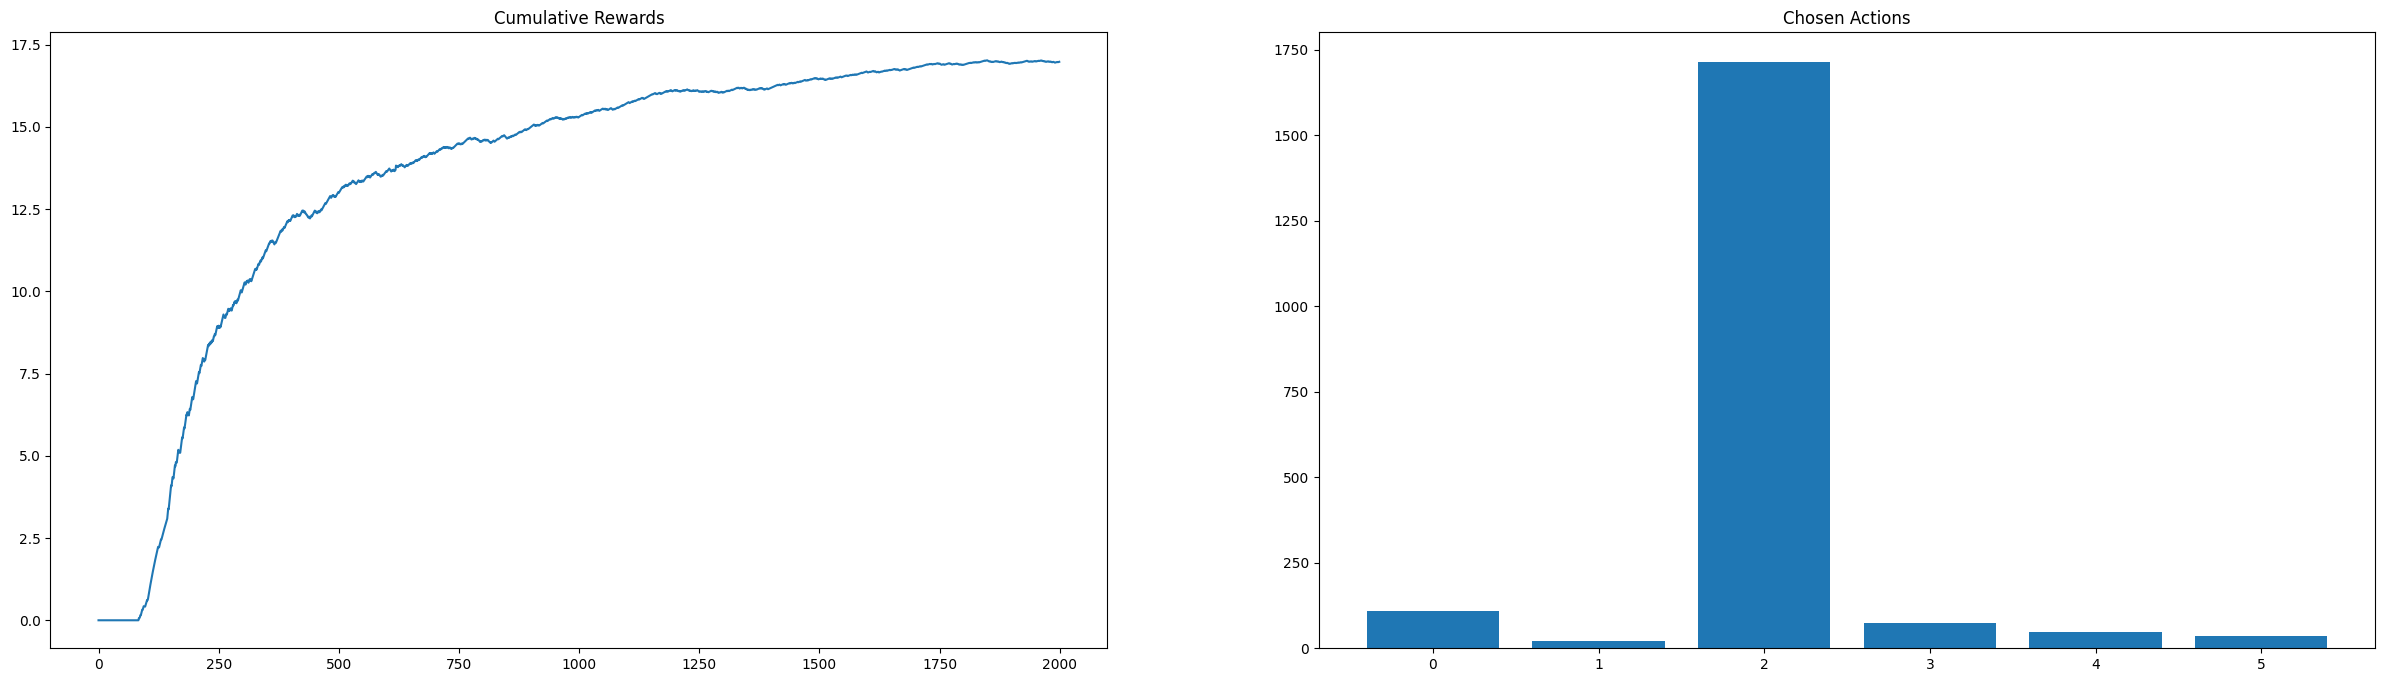

In [57]:
plot_history(eg_history)

In [58]:
egreedy_decay_agent= EpsilonGreedyAgent(enviroment, num_iterations=2000, epsilon=0.1, decay=0.01)
edg_history= egreedy_decay_agent.act()
print(f"TOTAL REWARD : {sum(edg_history['rewards'])}")

TOTAL REWARD : 38336.0


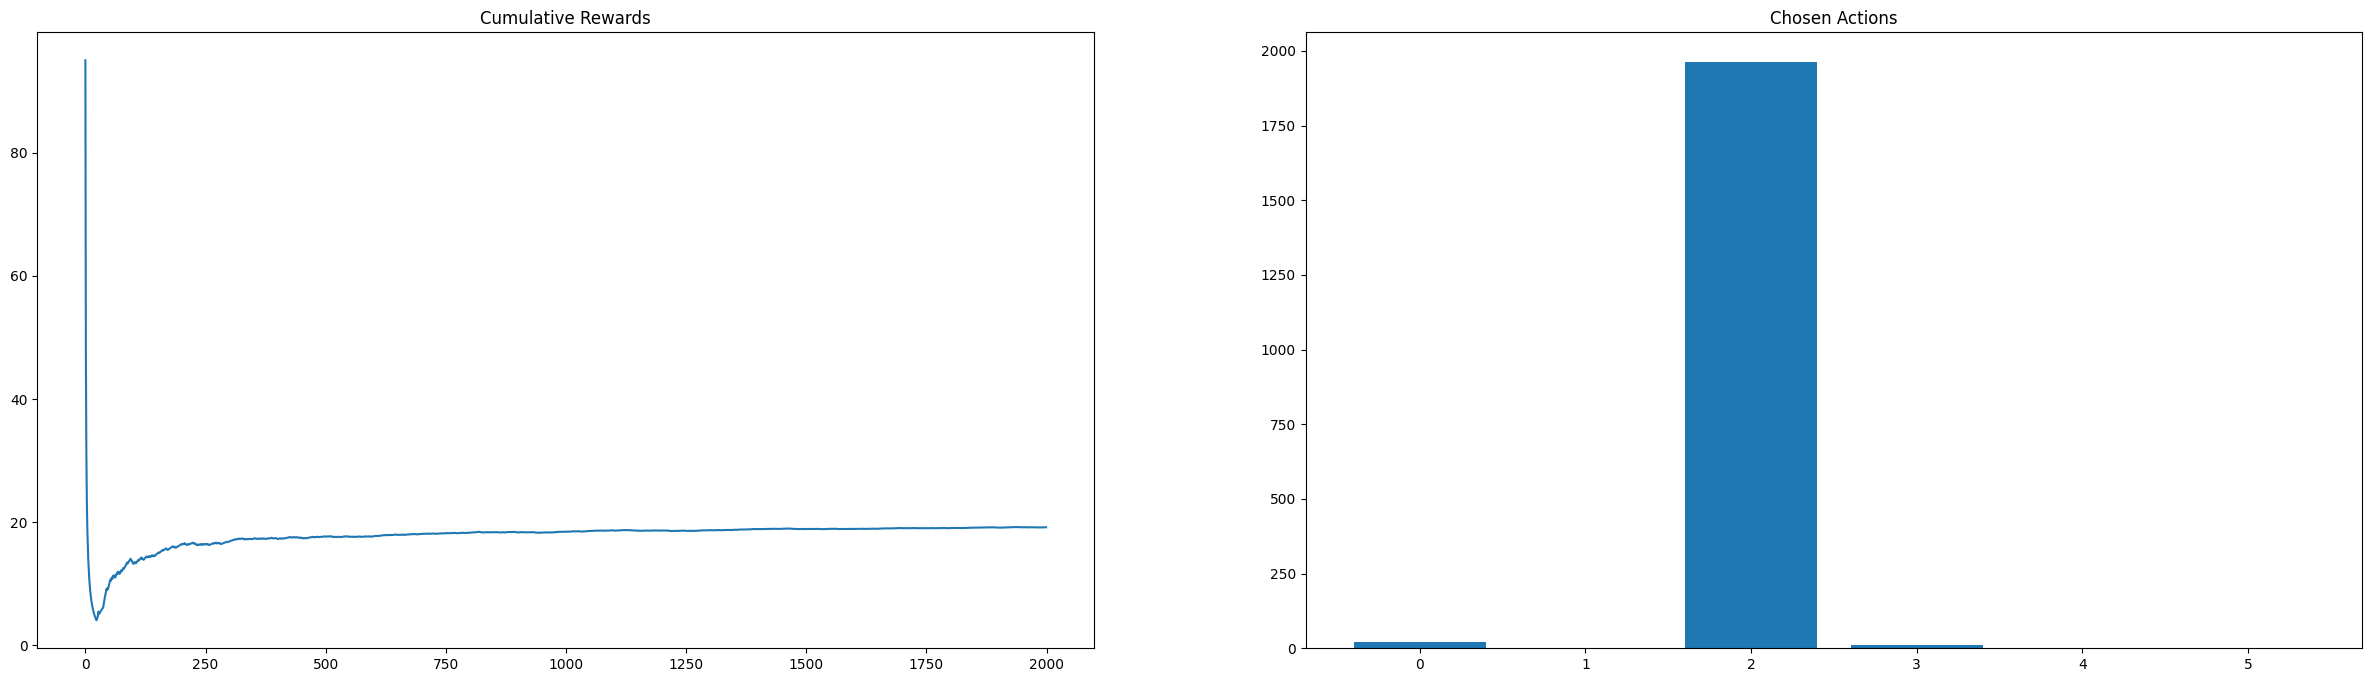

In [59]:
plot_history(edg_history)